# Creating widgets with magicgui

## 1. Create your own image processing function

In [17]:
from skimage import data
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np

In [4]:
IMAGE2D = data.cells3d()[30,1]

In [5]:
# Write a function to perform thresholding
def threshold_image(input_img, threshold):
    # Convert input image to floating point values with skimage.util.img_as_float
    return img_as_float(input_img) > threshold

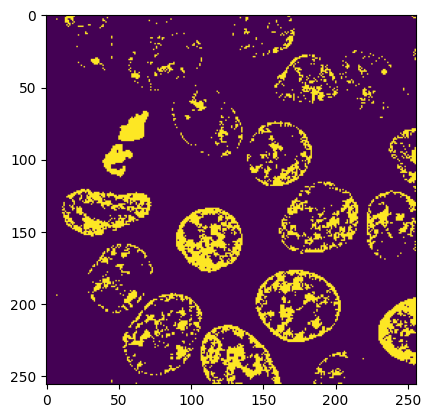

In [6]:
# Verify that your function works on sample data 
threshold = 0.25
cell_img_thresh = threshold_image(IMAGE2D, threshold)

plt.imshow(cell_img_thresh)

In [7]:
# Adapt function to work with napari Image layer
def threshold_image(input_img, threshold):
    # Reminder: access image data with .data
    return img_as_float(input_img.data) > threshold 

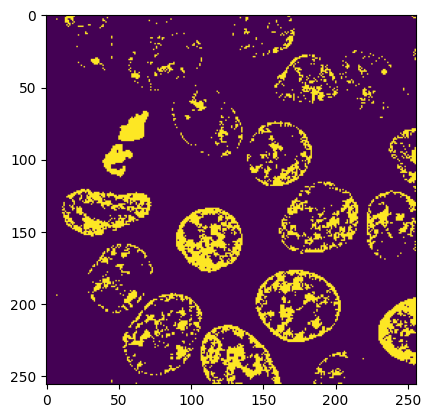

In [8]:
from napari.layers import Image

image_as_napari_layer = Image(IMAGE2D)

threshold = 0.25
cell_img_thresh = threshold_image(image_as_napari_layer, threshold)

plt.imshow(cell_img_thresh)

## 2. The magicgui decorator converts standard functions into widgets

In [9]:
# Import napari, magicgui and scikit-image functions
import napari
from magicgui import magicgui

from napari.layers import Image
from napari.types import LabelsData

In [55]:
@magicgui
def threshold_image(img: Image, threshold: float) -> LabelsData:
    return img_as_float(img.data) > threshold

viewer = napari.view_image(IMAGE2D)
viewer.window.add_dock_widget(threshold_image)

In [56]:
@magicgui(threshold={"widget_type": "FloatSlider", "max":1}, auto_call=True)
def threshold_image(img: "napari.layers.Image", threshold: "float") -> "napari.types.LabelsData":
    return img_as_float(img.data) > threshold

viewer = napari.view_image(IMAGE2D)
viewer.window.add_dock_widget(threshold_image)

## 3. Now try your thresholding pipeline on 3D data

In [11]:
IMAGE3D = data.cells3d()[:,1]

In [61]:
@magicgui(threshold={"widget_type": "FloatSlider", "max":1}, auto_call=True)
def threshold_image(img: "napari.layers.Image", threshold: "float") -> "napari.types.LabelsData":
    return img_as_float(img.data) > threshold

viewer = napari.view_image(IMAGE3D)
viewer.window.add_dock_widget(threshold_image)

## 4. Use Cellpose to obtain better segmentations

In [76]:
import cc3d

@magicgui(threshold={"widget_type": "FloatSlider", "max":1}, auto_call=True)
def threshold_image(img: "napari.layers.Image", threshold: "float") -> "napari.types.LabelsData":
    img_thresh = img_as_float(img.data) > threshold
    return cc3d.connected_components(img_thresh) 
    
viewer = napari.view_image(IMAGE3D)
viewer.window.add_dock_widget(threshold_image)

In [14]:
@magicgui(use_gpu={"widget_type": "CheckBox", "value": True})
def threshold_image(img: "napari.layers.Image", use_gpu: "bool") -> "napari.types.LabelsData":
    from cellpose import models
    
    model = models.CellposeModel(gpu=use_gpu)
    img = img_as_float(img.data)
    masks, __, __ = model.eval(img, z_axis=0, do_3D=True)
    
    return masks
    
viewer = napari.view_image(IMAGE3D)
viewer.window.add_dock_widget(threshold_image)

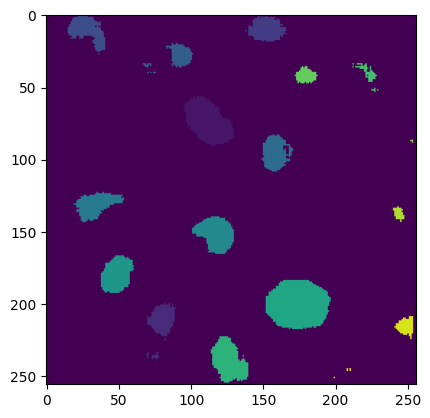

In [117]:
plt.imshow(masks[20])

In [120]:
viewer = napari.view_image(IMAGE3D)
viewer.add_labels(masks)

<Labels layer 'masks' at 0x7f368006c2d0>